In [83]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [84]:
job_title = 'Senior Data Engineer'
df_DE = df[df['job_title_short'] == job_title].copy()
df_DE['job_posted_month_no'] = df_DE['job_posted_date'].dt.month
df_DE_exploded = df_DE.explode('job_skills')
df_DE_pivot = df_DE_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DE_pivot


job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,vue.js,watson,webex,windows,wire,word,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,937,5,67,26,3,110,0,5,7,7,...,5,1,0,117,0,71,0,0,33,17
2,688,0,57,22,4,84,0,1,1,10,...,0,2,0,89,2,47,0,0,26,11
3,777,0,44,20,1,79,0,0,5,4,...,1,4,0,66,0,57,1,0,22,4
4,712,0,49,17,1,91,0,1,5,7,...,1,1,0,51,3,43,0,0,17,6
5,733,0,40,15,0,61,0,2,1,1,...,1,4,0,60,4,37,1,0,25,8
6,750,0,46,30,4,91,0,0,3,15,...,6,1,1,62,4,39,0,0,38,13
7,749,0,34,32,1,81,0,2,4,11,...,7,0,0,37,6,42,0,1,31,4
8,820,8,28,31,1,70,2,3,1,9,...,8,0,0,62,7,48,0,1,34,16
9,658,1,28,16,1,62,0,0,0,5,...,2,0,0,42,3,49,0,0,30,7


In [85]:
df_DE_pivot.loc['Total'] = df_DE_pivot.apply(sum)
df_DE_pivot = df_DE_pivot[df_DE_pivot.loc['Total'].sort_values(ascending=False).index]
df_DE_pivot = df_DE_pivot.drop('Total')
df_DE_pivot

job_skills,python,sql,aws,azure,spark,java,kafka,snowflake,airflow,scala,...,apl,google chat,wsl,monday.com,objective-c,nuix,webex,cordova,ocaml,symfony
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3267,3192,2173,1805,1824,1165,1156,1009,937,1001,...,0,0,0,0,0,0,0,0,1,0
2,2416,2351,1695,1326,1390,938,873,766,688,728,...,0,0,0,0,0,0,0,0,0,0
3,2508,2341,1696,1323,1436,933,870,756,777,784,...,0,1,1,0,0,1,0,0,0,0
4,2323,2317,1533,1262,1308,811,807,703,712,721,...,0,0,0,0,0,0,0,0,0,0
5,2160,2156,1471,1191,1224,719,749,718,733,639,...,0,0,1,0,0,0,0,0,0,0
6,2481,2575,1626,1454,1443,887,918,803,750,720,...,0,0,0,1,1,0,1,1,0,0
7,2421,2440,1676,1361,1371,828,777,742,749,748,...,0,0,0,0,0,0,0,0,0,0
8,2606,2590,1783,1423,1454,904,833,861,820,779,...,2,0,0,0,0,0,0,0,0,0
9,2204,2241,1415,1235,1209,709,679,686,658,609,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_DE_pivot = df_DE_pivot.reset_index()
df_DE_pivot['job_posted_month'] = df_DE_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DE_pivot.set_index('job_posted_month',inplace=True)
df_DE_pivot.drop(columns='job_posted_month_no', inplace=True)

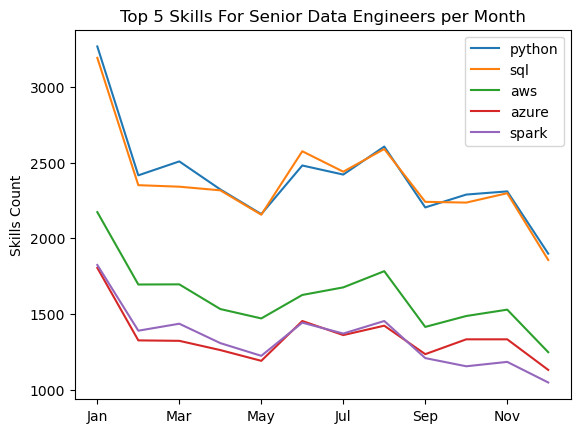

In [87]:
df_DE_pivot.iloc[:, :5].plot(kind='line')
plt.legend()
plt.xlabel('')
plt.ylabel('Skills Count')
plt.title(f'Top 5 Skills For {job_title}s per Month')
plt.show()